# 2. Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.size'] = 12
plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [3]:
%config InlineBackend.figure_format = 'retina'

## Data Correlations

Let's load in the pull Maddison project data. Here we let `mpd0` be the long form data.

In [4]:
usecols = ['year', 'countrycode', 'cgdppc', 'rgdpnapc', 'pop']
mpd0 = pd.read_excel('data/mpd2018.xlsx', sheet_name='Full data', usecols=usecols)

Now let's `pivot` the data into wide form and store it in `mpd`.

In [5]:
mpd = mpd0.pivot(index='year', columns='countrycode')

Here we plot log GDP per capita for a sample of countries (USA, China, and Japan)

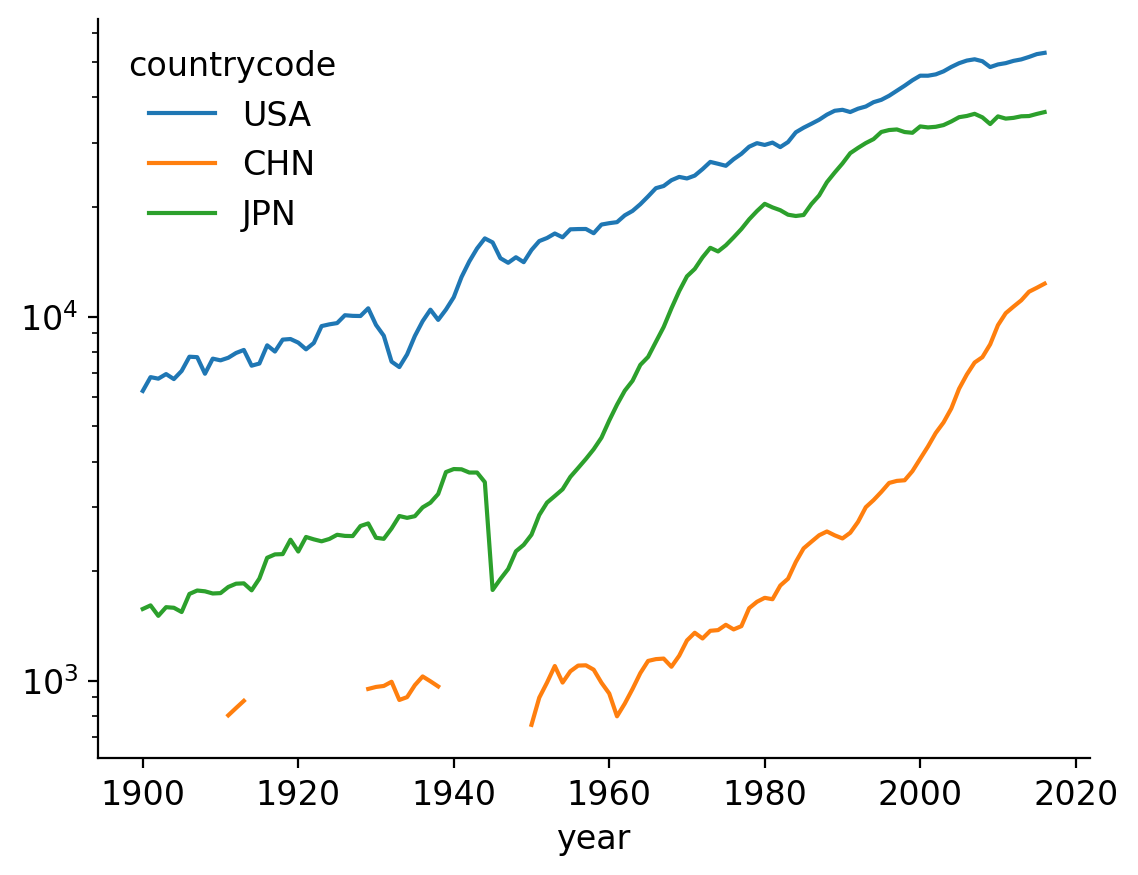

In [6]:
mpd['cgdppc'].loc[1900:, ['USA', 'CHN', 'JPN']].plot(logy=True);

It's often useful to study bivariate relationships. This tells us what kinds of correlations exist between the two variables, though it doesn't necessarily mean one is causing the other. Let's look at that ever important Malthusian relationship between the standard of living (consumption per capita) and population growth.

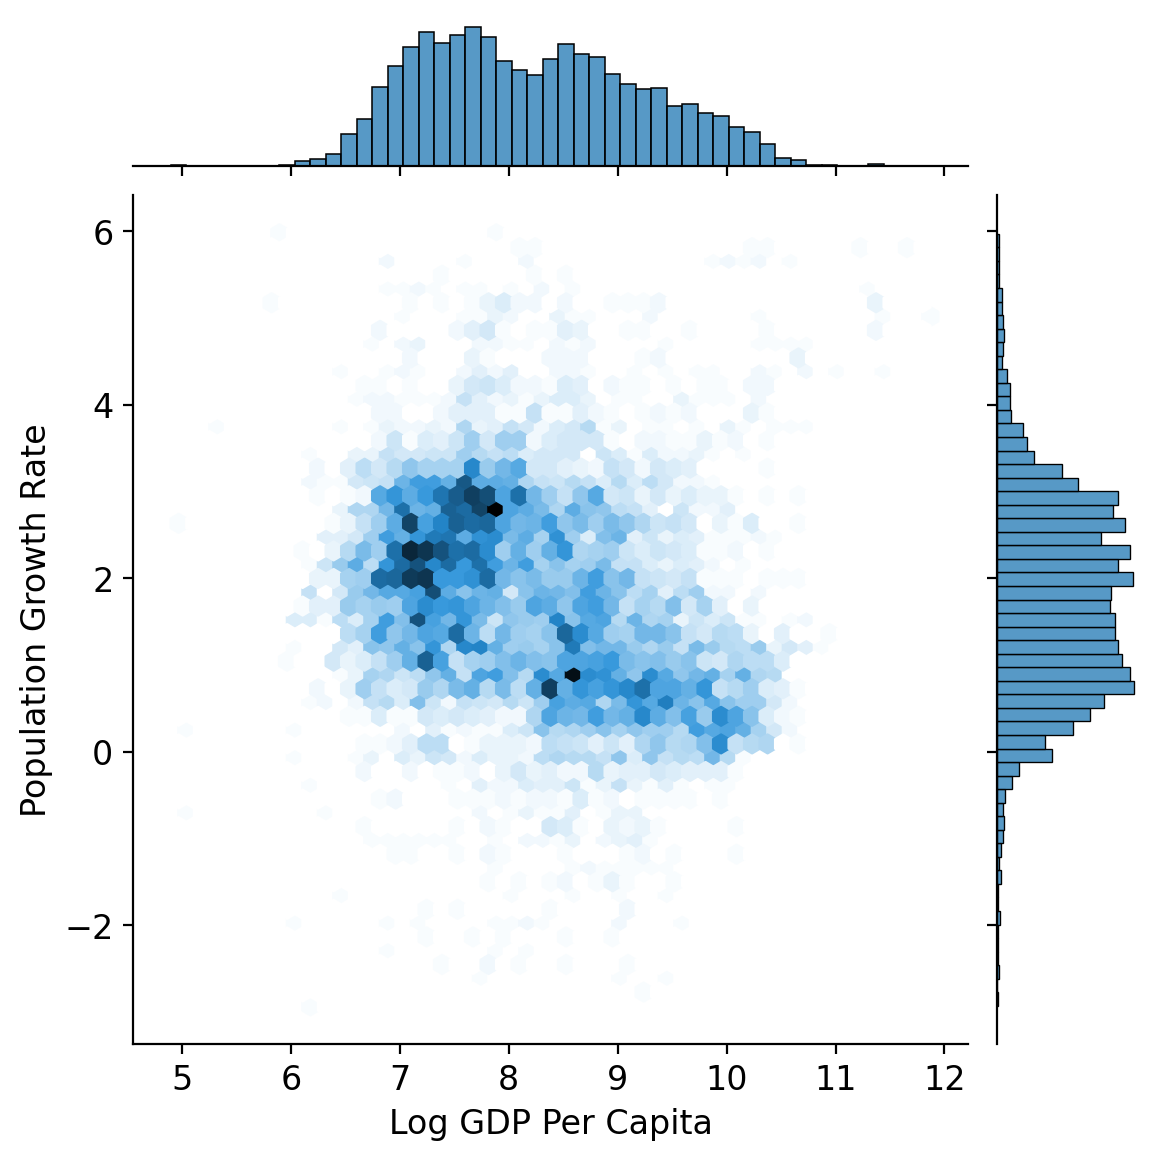

In [7]:
# create a copy of the data
mpd1 = mpd0.copy()

# generate our two variables of interest
mpd1['pop_growth'] = 100*np.log(mpd1['pop']).diff()
mpd1['log_cgdppc'] = np.log(mpd1['cgdppc'])

# remove outliers and missing data and focus on 20th century
mpd1 = mpd1.query('pop_growth > -3 and pop_growth < 6')
mpd1 = mpd1.query('year >= 1900 and year < 2000')
mpd1 = mpd1.dropna()

# remove missing data and plot
ax = sns.jointplot(x='log_cgdppc', y='pop_growth', kind='hex', data=mpd1)
ax.set_axis_labels(xlabel='Log GDP Per Capita', ylabel='Population Growth Rate');

So a negative relationship! But it's obviously pretty complicated. It's nice to see a scatter plot like this to understand the full richness of the data, but it can be a little overwhelming. Let's look at binned means instead

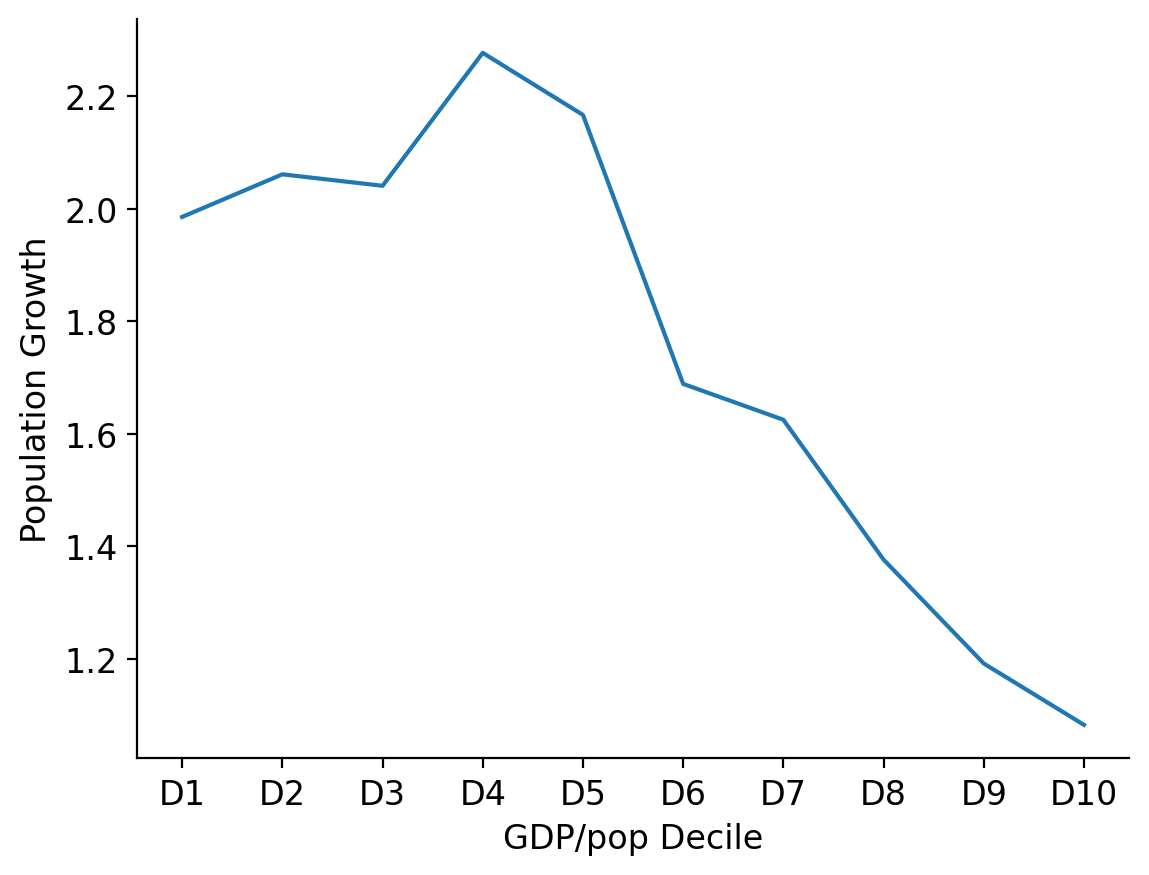

In [8]:
# create another copy of the data
mpd2 = mpd1.copy()

# create gdp deciles and find pop growth means
labels = [f'D{i+1}' for i in range(10)]
mpd2['cgdppc_bin'] = pd.qcut(mpd2['cgdppc'], 10, labels=labels)

# plot the means
pop_dec = mpd2.groupby('cgdppc_bin', observed=True)['pop_growth'].mean()
pop_dec.plot(xlabel='GDP/pop Decile', ylabel='Population Growth', xticks=range(10));